In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [2]:
data= pd.read_csv(r"C:\Users\light\Desktop\data analysis\datasets\Uber Drives\Uber Drives.csv")

In [3]:
df_uber= data.copy()

In [4]:
df_uber.head(3)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [5]:
# checking missing data
df_uber.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [6]:
df_uber.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

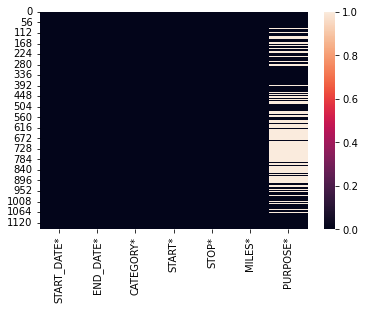

In [7]:
# checking the missing values with heat map
sns.heatmap(df_uber.isna())
plt.show()

In [8]:
# dropping the missing values
df_uber_1= df_uber.dropna().reset_index()

In [9]:
df_uber_1.dtypes

index            int64
START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [10]:
df_uber_1.head(3)

,index,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
2,3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting


In [11]:
# converting the data column as datetime
df_uber_1[['START_DATE*', 'END_DATE*']]= df_uber_1[['START_DATE*', 'END_DATE*']].apply(lambda x : pd.to_datetime(x, format= '%m/%d/%Y %H:%M'))

In [12]:
df_uber_1.head()

,index,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
2,3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
3,4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
4,5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [13]:
df_uber_1.dtypes

index                   int64
START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [14]:
# adding 'hour', 'day', 'day of week', 'month', 'weekday' columns for start date
df_uber_1['HOUR']= df_uber_1['START_DATE*'].dt.hour
df_uber_1['DAY']= df_uber_1['START_DATE*'].dt.day
df_uber_1['DAY OF WEEK']= df_uber_1['START_DATE*'].dt.weekday
df_uber_1['MONTH']= df_uber_1['START_DATE*'].dt.month
df_uber_1['WEEKDAY']= df_uber_1['START_DATE*'].dt.weekday.apply(lambda x: calendar.day_name[x])

In [15]:
df_uber_1.head()

,index,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
1,2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
2,3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
3,4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
4,5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [16]:
# creating check point:
df_uber_2= df_uber_1.copy()

In [17]:
df_uber_2.head()

,index,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
1,2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
2,3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
3,4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
4,5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [18]:
#  columns
df_uber_2.columns

Index(['index', 'START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*',
       'MILES*', 'PURPOSE*', 'HOUR', 'DAY', 'DAY OF WEEK', 'MONTH', 'WEEKDAY'],
      dtype='object')

In [19]:
# categories we have

df_uber_2['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

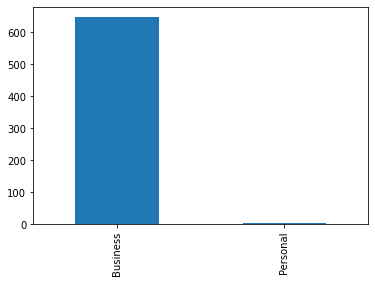

In [20]:
df_uber_2['CATEGORY*'].value_counts().plot(kind= 'bar')
plt.show()

#  so most of the people were business people who used uber.

In [21]:
# how long do people travel with uber(avg)

np.average(df_uber_2['MILES*'])

11.196324655436449

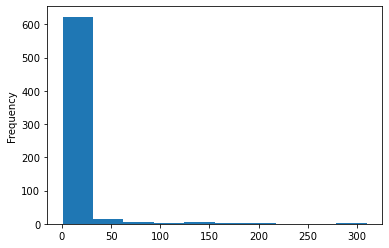

In [22]:
# how long do people travel with uber
df_uber_2['MILES*'].plot.hist()
plt.show()


# so most of the people travel B/W 0-45 miles

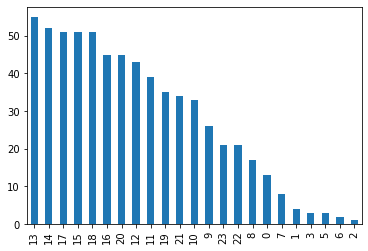

In [23]:
df_uber_2['HOUR'].value_counts().plot(kind= 'bar')
plt.show()

# most people travel at 1 PM.

In [24]:
# checking the purpose of trips:

df_uber_2['PURPOSE*'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

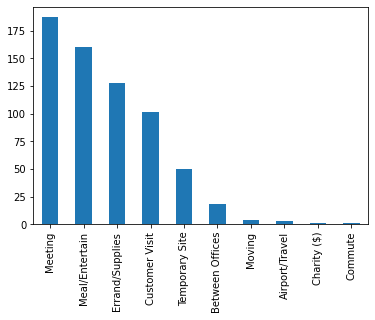

In [25]:
df_uber_2['PURPOSE*'].value_counts().plot(kind= 'bar')
plt.show()

# most people travel uber to attend meeting

In [26]:
# which day has the highest number of trips:

df_uber_2['WEEKDAY'].value_counts()

Friday       125
Tuesday       94
Thursday      92
Sunday        87
Monday        87
Wednesday     85
Saturday      83
Name: WEEKDAY, dtype: int64

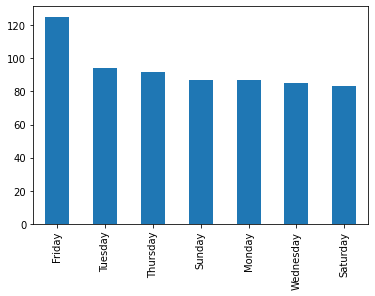

In [27]:
df_uber_2['WEEKDAY'].value_counts().plot(kind= 'bar')
plt.show()
# most people travel on Fridays

In [28]:
# what are the number of trips per each day?

df_uber_2.groupby('DAY')['END_DATE*'].count().sort_values(ascending= False)

DAY
21    31
18    30
29    30
19    30
4     28
28    27
12    27
1     25
8     25
22    24
7     23
6     22
20    22
14    21
11    21
5     21
27    20
3     20
26    20
10    19
25    19
2     18
24    18
13    17
15    16
17    16
16    15
23    14
9     12
30    12
31    10
Name: END_DATE*, dtype: int64

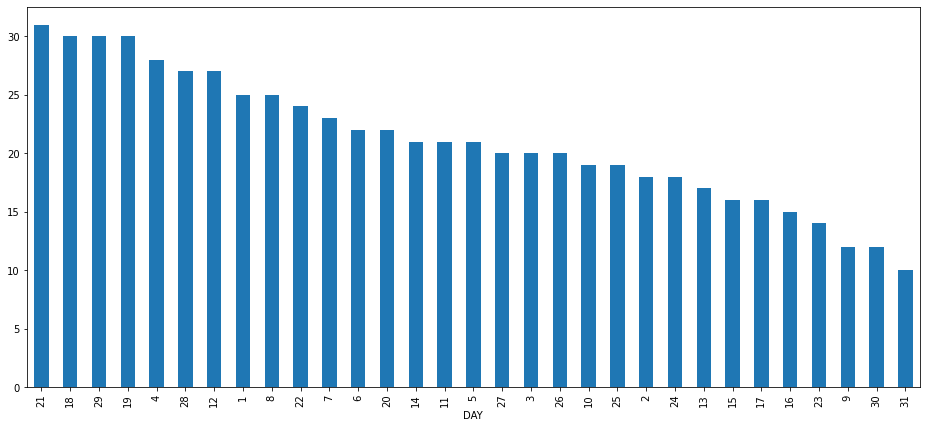

In [29]:
df_uber_2.groupby('DAY')['END_DATE*'].count().sort_values(ascending= False).plot(kind= 'bar', figsize= (16, 7))
plt.show()

In [30]:
# what are the trips in the months

df_uber_2.groupby('MONTH')['END_DATE*'].count().sort_values(ascending= False)

MONTH
12    134
2      82
6      73
3      71
11     60
1      59
4      50
5      46
7      46
10     20
8      12
Name: END_DATE*, dtype: int64

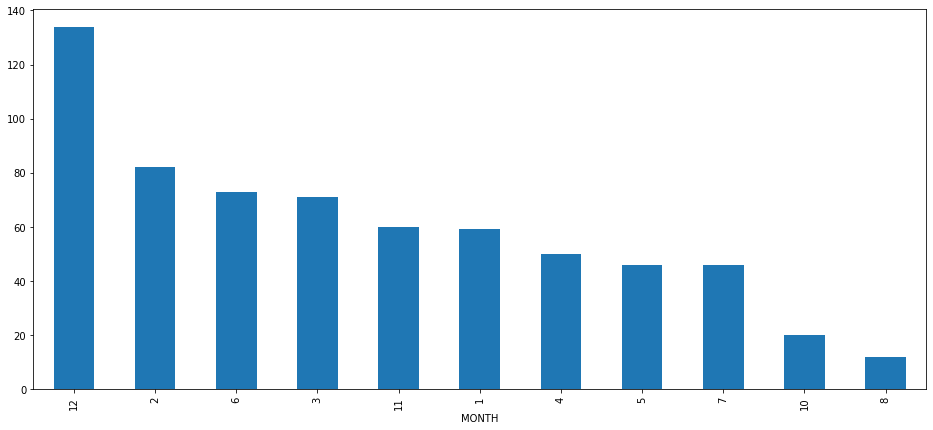

In [31]:
df_uber_2.groupby('MONTH')['END_DATE*'].count().sort_values(ascending= False).plot(kind= 'bar', figsize= (16, 7))
plt.show()

# most of the people traveled on December

In [32]:
# Where do people start boarding their trip from most?
df_uber_2.groupby('START*')['START_DATE*'].count().sort_values(ascending= False)

START*
Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
                   ... 
Huntington Woods      1
Heritage Pines        1
Hell's Kitchen        1
Gulfton               1
Winston Salem         1
Name: START_DATE*, Length: 131, dtype: int64

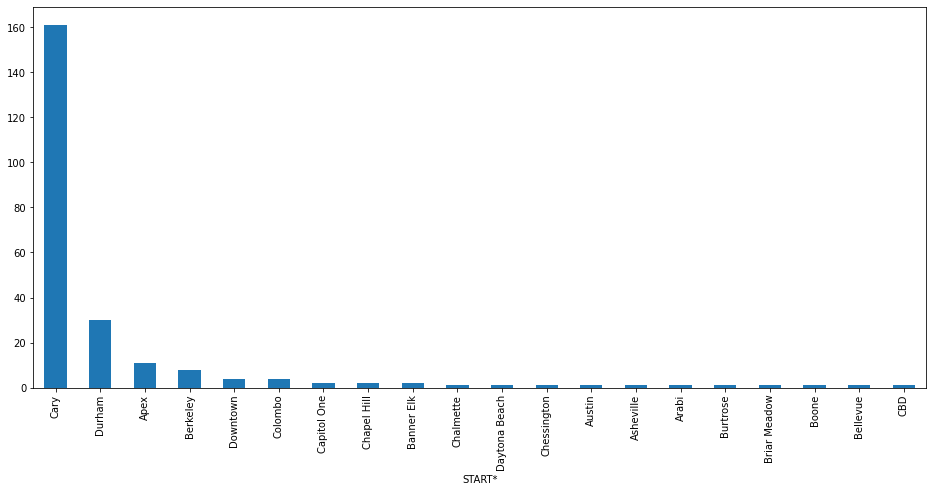

In [33]:
df_uber_2.groupby('START*')['START_DATE*'].count().head(20).sort_values(ascending= False).plot(kind= 'bar', figsize= (16, 7))
plt.show()

# so the most imp boarding/starting point is 'Cary'